In [1]:
install.packages("arules")
install.packages("arulesViz")
install.packages("arulesData")
install.packages("pacman")
install.packages("rio")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("data.table")
install.packages("magrittr")
library(arules)
library(magrittr)
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ca’, ‘colorspace’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘arulesData’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package int

In [3]:
data("Groceries")
str(Groceries)
summary(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [4]:
itemsets<-Groceries%>%eclat(parameter=list(supp=0.001,maxlen=4))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.001      1      4 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 9 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating sparse bit matrix ... [157 row(s), 9835 column(s)] done [0.00s].
writing  ... [13106 set(s)] done [0.04s].
Creating S4 object  ... done [0.00s].


In [5]:
rules<-itemsets%>%ruleInduction(Groceries)

In [6]:
rules

set of 258 rules 

In [7]:
options(digits = 2)
inspect(rules[1: 50])

     lhs                         rhs                support confidence lift itemset
[1]  {liquor,                                                                      
      red/blush wine}         => {bottled beer}      0.0019       0.90 11.2     144
[2]  {curd,                                                                        
      cereals}                => {whole milk}        0.0010       0.91  3.6     154
[3]  {yogurt,                                                                      
      cereals}                => {whole milk}        0.0017       0.81  3.2     156
[4]  {butter,                                                                      
      jam}                    => {whole milk}        0.0010       0.83  3.3     169
[5]  {soups,                                                                       
      bottled beer}           => {whole milk}        0.0011       0.92  3.6     275
[6]  {other vegetables,                                                     

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



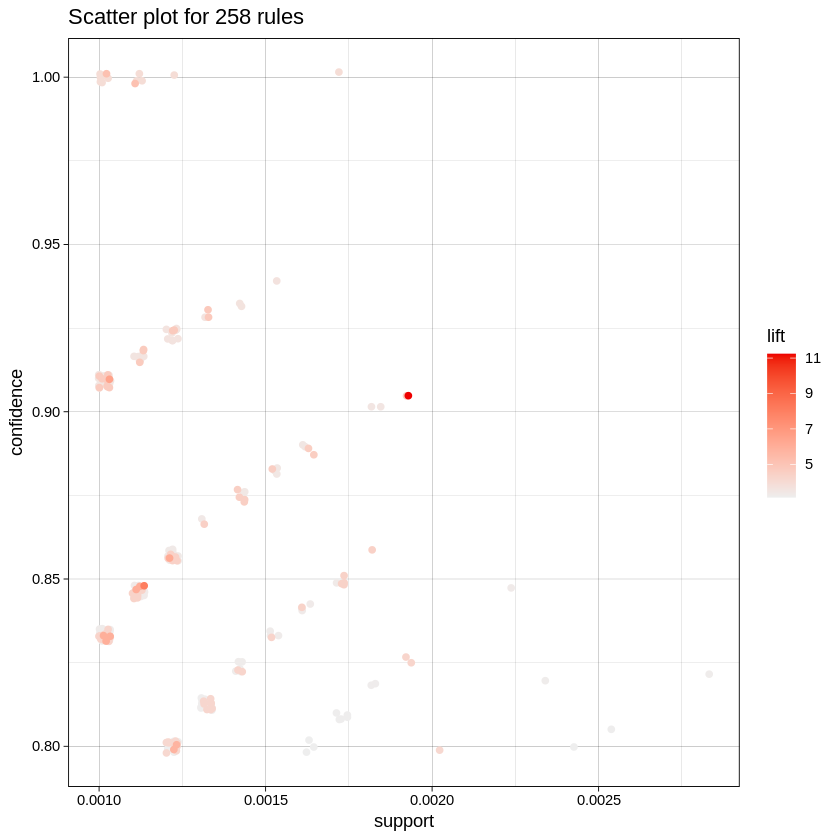

In [8]:
plot(rules)

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


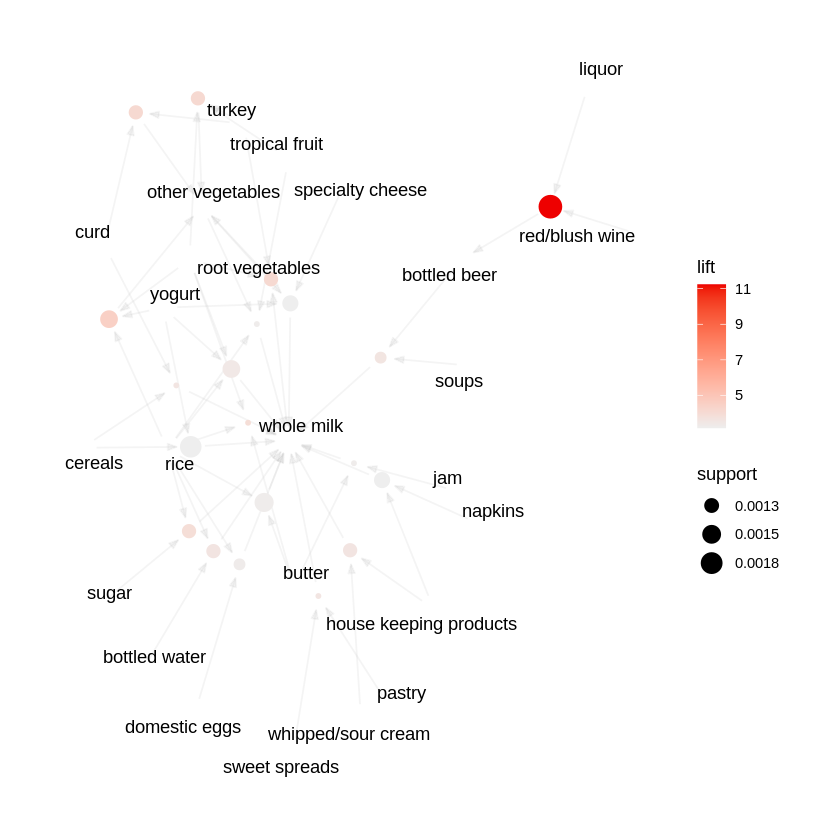

In [9]:
plot(rules[1:20],method="graph",control=list(type="items"))